In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [7]:
def p(k, i, xi, A, a, h, k2coord, Gt):
    return 1 / (1 + math.exp(-2 * I(k, i, xi, A, a, h, k2coord, Gt)))

def I(k, i, xi, A, a, h, k2coord, Gt):
    total = 0
    zeta = random.uniform(-1,1)  # sampled for each unique (k,i)
    for j in k2coord[k]:  # for each coordinate in cluster k
        eta = random.uniform(-1,1)  # different for each cell
        sigma = Gt[j]
        total += ((A*xi[k] + a*eta) * sigma) + h*zeta
    return (1 / len(k2coord[k])) * total

def cluster_info(arr):
    """ number of clusters (nonzero fields separated by 0s) in array
        and size of cluster
    """
    data = []
    k2coord = {}
    k = 0
    if arr[0] != 0: # left boundary
        data.append(0) # we will increment later in loop  
        k2coord[k] = []
    else:
        k=-1

    # print("arr", arr)
    # print("data", data)
    
    for i in range(0,len(arr)-1):
        if arr[i] == 0 and arr[i+1] != 0:
            data.append(0)
            k += 1
            k2coord[k] = []
        if arr[i] != 0:
            data[-1] += 1
            k2coord[k].append(i)
    if arr[-1] != 0:
        if data:  # if array is not empty
            data[-1] += 1  # right boundary
            k2coord[k].append(len(arr)-1)
        else:
            data.append(1)  
            k2coord[k] = [len(arr)-1]
            
    Ncl = len(data)  # number of clusters
    Nk = data  # Nk[k] = size of cluster k
    coord2k = {e:k for k,v in k2coord.items() for e in v}
    return Ncl, Nk, k2coord, coord2k

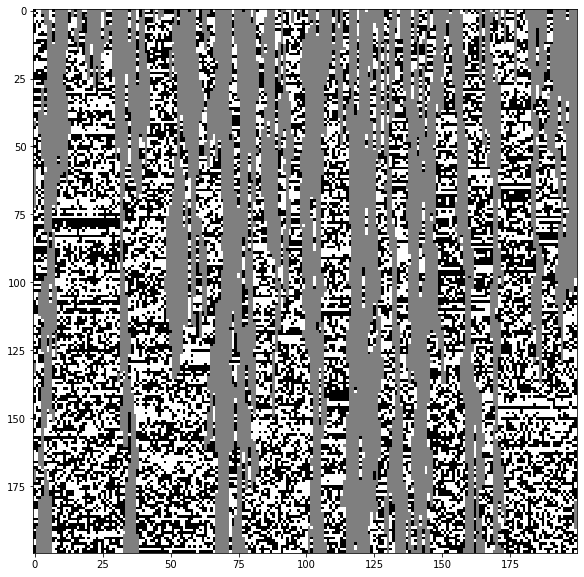

In [56]:
pd = 0.05
pe = 0.01
ph = 0.04 # vary

pa = 0.4

N = 200

A = 1.8
a = 1
h = 0

G = np.zeros(shape=(N,N)).astype(int)
G[0] = np.random.choice(a=[-1,0,1], p=[pa/2, 1-pa, pa/2], size=N, replace=True)

for t in range(N-1):
    Ncl, Nk, k2coord, coord2k = cluster_info(G[t])
    xi = np.random.uniform(-1, 1, size=Ncl)  # unique xi for each cluster k
    # print(Ncl, Nk, k2coord, coord2k, xi)
    # print(xi)
    # print()
    for i in range(N):
        # traders update their stance
        if G[t,i] != 0:
            k = coord2k[i]
            # print(k)
            pp = p(k, i, xi, A, a, h, k2coord, G[t])
            if random.random() < pp:
                G[t+1,i] = 1
            else:
                G[t+1,i] = -1

        
        # trader influences non-active neighbour to join
        if G[t,i] != 0:
            stance = G[t,i]
            if random.random() < ph:
                if i+1==N:
                    if G[t,i-1] == 0:
                        G[t+1,i-1] = random.choice([-1,1])
                elif i-1 == -1:
                    if G[t,i+1] == 0:
                        G[t+1,i-1] = random.choice([-1,1])
                else:
                    if G[t,i-1] == 0 and G[t,i+1] == 0:
                        ni = random.choice([-1,1])
                        G[t+1,i+ni] = random.choice([-1,1])
                    elif G[t,i-1] == 0:
                        G[t+1,i-1] = random.choice([-1,1])
                    elif G[t,i+1] == 0:
                        G[t+1,i+1] = random.choice([-1,1])
                    else:
                        continue

        # active trader diffuses if it has inactive neighbour
        # only happens at edge of cluster
        if G[t,i] != 0:
            if random.random() < pd:
                if (i+1 == N) or (i-1 == -1):
                    G[t+1,i] = 0
                elif (G[t,i-1] == 0) or (G[t,i+1] == 0):
                    G[t+1,i] = 0
                else:
                    continue

        # nontrader enters market
        if G[t,i] == 0:
            if random.random() < pe:
                G[t+1,i] = random.choice([-1,1])

plt.figure(figsize=(10,10))
plt.imshow(G, cmap="binary", interpolation="None")
plt.show()